# ADS 509 Sentiment Assignment

## Mohammad Mahmoudighaznavi


## General Assignment Instructions




In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [5]:
# Add any additional import statements you need here

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import emoji
import seaborn as sns
import advertools as adv




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/Mohammad/Downloads/M1 Assignment Data/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 


In [7]:
# Read in the lyrics data

lyrics_data= {"artist":[], "song":[],"lyrics": []} 
lyrics_path=data_location+lyrics_folder
for artist in os.listdir(lyrics_path):
     for song in os.listdir(os.path.join (lyrics_path+artist)):
             song_name= song.split("_")[1].split(".")[0]
             with open (os.path.join(lyrics_path+artist, song),'r') as f:
                 lyric=f.read()
             lyrics_data['artist'].append(artist) 
             lyrics_data['song'].append(song_name) 
             lyrics_data['lyrics'].append(lyric)
            

# convert dictionary to data frame

lyrics_data=pd.DataFrame(lyrics_data)
lyrics_data.head()

,artist,song,lyrics
0,cher,88degrees,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n..."
1,cher,adifferentkindoflovesong,"""A Different Kind Of Love Song""\n\n\n\nWhat if..."
2,cher,afterall,"""After All""\n\n\n\nWell, here we are again\nI ..."
3,cher,again,"""Again""\n\n\n\nAgain evening finds me at your ..."
4,cher,alfie,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs..."


In [8]:
# Read in the twitter data

twitter_files = os.listdir(data_location + twitter_folder) 
desc_files = [f for f in twitter_files if "followers_data" in f] 
tweets_data= {"artist":[], "description":[]} 
for f in desc_files :
    artist = f.split("_")[0]
    with open(data_location + twitter_folder + f,'r', encoding='utf8') as infile : 
        next(infile)
        for idx, line in enumerate(infile.readlines()) : 
            line = line.strip().split("\t")
            description = line[-1] 
            tweets_data['artist'].append(artist) 
            tweets_data['description'].append(description )

            
# convert dictionary to data frame

tweets_data=pd.DataFrame(tweets_data)
tweets_data.head()

,artist,description
0,cher,1014
1,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,cher,csu
4,cher,Writer @Washinformer @SpelmanCollege alumna #D...


In [9]:
# Read in the positive and negative words using dictionary

positive_words=[]
negative_words=[]


with open('/Users/Mohammad/Downloads/M1 Assignment Data/M1 Results/positive-words.txt' ,'r', encoding='utf8') as f : 
        positive=f.readlines()

        
with open('/Users/Mohammad/Downloads/M1 Assignment Data/M1 Results/negative-words.txt' ,'r', encoding='utf8') as f : 
        negative=f.readlines()
        
        

for line in positive:
    if ';' not in line and line!= '\n': 
        positive_words.append(line.strip())
        
        
for line in negative:
    if ';' not in line and line!= '\n':
        negative_words.append(line.strip())
        
        
        
#create a dictionary of scores

sentiment_dict={'word':[], 'score':[]}

for word in positive_words:
    sentiment_dict['word'].append(word)
    sentiment_dict['score'].append(1)
    
for word in negative_words:
    sentiment_dict['word'].append(word)
    sentiment_dict['score'].append(-1)
    

# convert dictionary to data frame

sentiment_df=pd.DataFrame(sentiment_dict)
sentiment_df

,word,score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
6784,zaps,-1
6785,zealot,-1
6786,zealous,-1
6787,zealously,-1


In [15]:
# Get Negative Words separately
neg_words = pd.read_csv("/Users/Mohammad/Downloads/M1 Assignment Data/M1 Results/negative-words.txt",names=['word'], skiprows=34, encoding = "ISO-8859-1")
neg_words["sentiment"] = "negative"
neg_words["score"] = -1
neg_words

,word,sentiment,score
0,2-faced,negative,-1
1,2-faces,negative,-1
2,abnormal,negative,-1
3,abolish,negative,-1
4,abominable,negative,-1
...,...,...,...
4778,zaps,negative,-1
4779,zealot,negative,-1
4780,zealous,negative,-1
4781,zealously,negative,-1


In [14]:
# Get Positive Words separately
pos_words = pd.read_csv("/Users/Mohammad/Downloads/M1 Assignment Data/M1 Results/positive-words.txt",names=['word'], skiprows=34, encoding = "ISO-8859-1")
pos_words["sentiment"] = "positive"
pos_words["score"] = 1
pos_words

,word,sentiment,score
0,a+,positive,1
1,abound,positive,1
2,abounds,positive,1
3,abundance,positive,1
4,abundant,positive,1
...,...,...,...
2001,youthful,positive,1
2002,zeal,positive,1
2003,zenith,positive,1
2004,zest,positive,1


## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [16]:
#Albrecht, J., Ramachandran, S., Winkler, C. Blueprints for Text Analytics Using Python (p. 301).
#calculation for sentiment score
pos_score = 1
neg_score = -1
word_dict = sentiment_df.set_index('word').to_dict()['score']



def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower()) 
    
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    
    return (sentiment_score/len(bag_of_words))

In [18]:
lyrics_data['sentiment_score'] = lyrics_data['lyrics'].apply (bing_liu_score)
lyrics_data.sample(10)

,artist,song,lyrics,sentiment_score
410,robyn,underneaththeheart,"""Underneath The Heart""\n\n\n\nI look into your...",0.012876
13,cher,aworldwithoutheroes,"""A World Without Heroes""\n\n\n\nA world withou...",0.006452
226,cher,sittinonthedockofthebay,"""(Sittin' On) The Dock Of The Bay""\n\n\n\nSitt...",0.009524
207,cher,red,"""Red""\n\n\n\nAll I see is red, now\nJust can't...",-0.002994
251,cher,thegirlfromipanema,"""The Girl From Ipanema""\n\n\n\nTall and tan an...",0.043478
268,cher,thetwelfthofnever,"""The Twelfth Of Never""\n\n\n\nYou ask how much...",0.058824
283,cher,warpaintandsoftfeathers,"""War Paint And Soft Feathers""\n\n\n\nThey were...",0.018692
35,cher,chiquititaspanishversion,"""Chiquitita (Spanish Version)""\n\n\n\nChiquiti...",0.000000
7,cher,allireallywanttodo,"""All I Really Want To Do""\n\n\n\nNow I ain't l...",-0.037344
22,cher,bodytobodyhearttoheart,"""Body To Body, Heart To Heart""\n\n\n\nBody to ...",-0.012500


# Questions
### Q: Overall, which artist has the higher average sentiment per song?

In [19]:
# average sentiment score per artist

lyrics_data.groupby('artist')['sentiment_score'].mean()

artist
cher     0.013519
robyn    0.008752
Name: sentiment_score, dtype: float64

#### A: Cher with 0.013 average sentiment score has a higher score.

### Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score?

In [20]:
# highest sentiment scores for Cher

cher_song=lyrics_data.loc[lyrics_data['artist']=='cher']
highest_cher=cher_song.sort_values('sentiment_score', ascending=False).head(3)
highest_cher

,artist,song,lyrics,sentiment_score
181,cher,mylove,"""My Love""\n\n\n\nWhen I go away\nI know my hea...",0.222222
179,cher,moveme,"""Move Me""\n\n\n\nMove me\nLove the way you mov...",0.155172
155,cher,loveandunderstanding,"""Love And Understanding""\n\n\n\nHere, here in ...",0.141479


In [22]:
# lowest sentiment scores for Cher

lowest_cher=cher_song.sort_values('sentiment_score', ascending=True).head(3)
lowest_cher

,artist,song,lyrics,sentiment_score
42,cher,crymyselftosleep,"""Cry Myself To Sleep""\n\n\n\nEvery night, I la...",-0.097222
196,cher,outrageous,"""Outrageous""\n\n\n\nOutrageous, outrageous\n(T...",-0.084806
133,cher,iwalkonguildedsplinters,"""I Walk On Guilded Splinters""\n\n\n\nSome peop...",-0.075301


In [23]:
# print lyrics of Cher

print(highest_cher['lyrics'][181].replace('\n', ''))
print ('\n')
print(highest_cher['lyrics'][179].replace('\n', ''))
print ('\n')
print(highest_cher['lyrics'][155].replace('\n', ''))
print ('\n')
print(lowest_cher['lyrics'][42].replace('\n', ''))
print ('\n')
print(lowest_cher['lyrics'][196].replace('\n', ''))
print ('\n')
print(lowest_cher['lyrics'][133].replace('\n', ''))

"My Love"When I go awayI know my heart can stay with my loveIt's understoodEverywhere with my loveMy love does it good, whoaMy love, oh only my loveMy love does it goodAnd when the cupboard's bareI'll still find something there with my loveIt's understoodEverywhere with my loveMy love does it so good, whoaMy love, oh only my loveMy love does it goodOnly my love, oh only my loveOnly my love, hold the other things to meOh, only my love, oh only my loveOnly my love does it good to meEverywhere with my loveDon't you see my loveIt does it so goodOh, only my love, only my loveMy love does it goodDon't ever ask me whyI never say "good-bye" to my loveIt's understood'Cause everywhere with my loveMy love does it good, whoaOnly my love, oh only my loveMy love does it goodOh only my loveOnly my love does it good to me,whoa


"Move Me"Move meLove the way you move me, babyGroove meLove the way you groove meMaking love with youLittle things that you doMake me feel so good insideOh oh do meC'mon, c'mo

#### The sentiment analysis of Cher's songs reveals a clear pattern in the lyrical content. Songs like 'my love', 'move me', and 'love and understanding' have the highest sentiment scores, frequently using uplifting words like "love." This positive sentiment is in stark contrast to her songs with the lowest sentiment scores, namely 'cry myself to sleep', 'outrageous', and 'i walk on guilded splinters'. These tracks feature words with more negative connotations such as "outrageous," "kill," "lies," "funky," "burn," and "poison." Such insights highlight the emotional spectrum covered by Cher in her music, from feelings of love and positivity to themes of despair and disappointment.

### Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score?

In [24]:
# highest sentiment scores for Robyn

robyn_song=lyrics_data.loc[lyrics_data['artist']=='robyn']
highest_robyn=robyn_song.sort_values('sentiment_score', ascending=False).head(3)
highest_robyn

,artist,song,lyrics,sentiment_score
380,robyn,loveisfree,"""Love Is Free""\n\n\n\nFree\nLove is free, baby...",0.179894
367,robyn,indestructible,"""Indestructible""\n\n\n\nI'm going backwards th...",0.070081
347,robyn,doyoureallywantmeshowrespect,"""Do You Really Want Me (Show Respect)""\n\n\n\n...",0.065844


In [25]:
# lowest sentiment scores for Robyn

lowest_robyn=robyn_song.sort_values('sentiment_score', ascending=True).head(3)
lowest_robyn

,artist,song,lyrics,sentiment_score
342,robyn,dontfuckingtellmewhattodo,"""Don't Fucking Tell Me What To Do""\n\n\n\nMy d...",-0.170354
343,robyn,dontfuckingtellmewhattodo114520,"""Don't Fucking Tell Me What To Do""\n\n\n\nMy d...",-0.170354
334,robyn,criminalintent,"""Criminal Intent""\n\n\n\nSomebody alert the au...",-0.103113


In [26]:
# print lyrics of Robyn

print(highest_robyn['lyrics'][380].replace('\n', ''))
print ('\n')
print(highest_robyn['lyrics'][367].replace('\n', ''))
print ('\n')
print(highest_robyn['lyrics'][347].replace('\n', ''))
print ('\n')
print(lowest_robyn['lyrics'][342].replace('\n', ''))
print ('\n')
print(lowest_robyn['lyrics'][343].replace('\n', ''))
print ('\n')
print(lowest_robyn['lyrics'][334].replace('\n', ''))

"Love Is Free"FreeLove is free, babyFreeLove is free, babyBoom boom boom boom boom chica boomLet me give it to you, babyChica boom chica boom chica boomChica boom chica boom chica boomFreeLove is free, babyFreeLove is free, babyBoom boom boom boom boom chica boomLet me give it to you, babyI'ma give it to you, babyI'ma give it when I'm readySome lose, some steadySome light, some heavyIt's all over this citySometimes in the ugly, sometimes in the prettyYou never know where you get it cause you can't control it and you can't unfold it, slow downI'ma give it to you, babyI'ma give it when I'm readySome lose, some steadySome light, some heavyIt's all over this citySometimes in the ugly, sometimes in the prettyYou never know where you get it cause you can't control it and you can't unfold it, slow downFreeLove is free, babyFreeLove is free, babyBoom boom boom boom boom chica boomLet me give it to you, babyYeah! Yeah! Yeah! Yeah!Love is free, babyLove is free, babyI'ma give it to you, babyI'ma

#### A: From the sentiment analysis of Robyn's songs, it's evident that tracks such as 'love is free', 'indestructible', and 'do you really want me (show respect)' rank highest in positive sentiment, predominantly featuring affirming words like "love," "free," and "baby." On the other hand, songs like 'don't fucking tell me what to do' and 'criminal intent' showcase lower sentiment scores. Interestingly, the repetition of two lyrics in Robyn's lowest sentiment songs suggests a possible oversight in the initial data preprocessing, hinting at potential duplicates. Just as observed in Cher's tracks, the presence of the word "love" correlates with higher sentiment scores. Although certain negative terms appear in songs with high sentiment, they likely contribute to the overall theme or narrative rather than detracting from the song's positive nature.

### Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




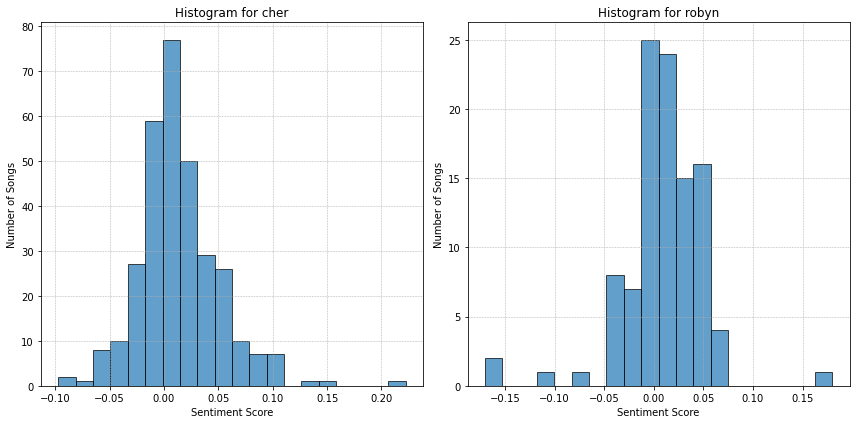

In [29]:
# Histogram visualization using matplotlib
artists = lyrics_data['artist'].unique()

plt.figure(figsize=(12, 6))

for i, artist in enumerate(artists, 1):
    plt.subplot(1, len(artists), i)
    plt.hist(lyrics_data[lyrics_data['artist'] == artist]['sentiment_score'], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram for {artist}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Number of Songs')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
plt.tight_layout()
plt.show()


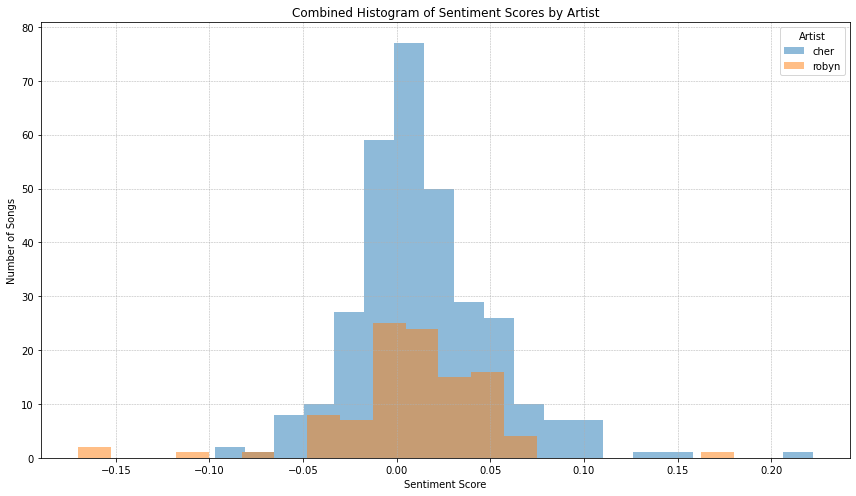

In [30]:
# Combined Histogram visualization using matplotlib
plt.figure(figsize=(12, 7))

# Plotting histograms for each artist
for artist in artists:
    plt.hist(lyrics_data[lyrics_data['artist'] == artist]['sentiment_score'], bins=20, alpha=0.5, label=artist)

plt.title('Combined Histogram of Sentiment Scores by Artist')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Songs')
plt.legend(title='Artist')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Sentiment Analysis on Twitter Descriptions

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [31]:
positive_emojis={ '♥️': +1 ,'😍' : +1, '💗' : +1, '🥰':+1, '😘':+1, '💓':+1,
            '✌️':+1, '😇':+1 , '💕':+1, '👏' :+1,'😀':+1,'💯':+1,'🙏🏼':+1,'💖':+1 }

negative_emojis={'💔':-1, '😭':-1, '😔':-1, '🖤':-1, '😱':-1,  '😡':-1, 
            '😈': -1,  '😤':-1, '😱':-1 , '😢':-1,'😔':-1,'☹️':-1}

emoji_dict={**positive_emojis,**negative_emojis}
emoji_dict

{'♥️': 1,
 '😍': 1,
 '💗': 1,
 '🥰': 1,
 '😘': 1,
 '💓': 1,
 '✌️': 1,
 '😇': 1,
 '💕': 1,
 '👏': 1,
 '😀': 1,
 '💯': 1,
 '🙏🏼': 1,
 '💖': 1,
 '💔': -1,
 '😭': -1,
 '😔': -1,
 '🖤': -1,
 '😱': -1,
 '😡': -1,
 '😈': -1,
 '😤': -1,
 '😢': -1,
 '☹️': -1}

In [32]:
tweets_data['emoji']=tweets_data['description'].map(emoji.distinct_emoji_list)


# count emojies from our created dictionary of emojies

def emoji_counts(text):
    sentiment_score = 0
    bag_of_emoji = text
    for emoji in bag_of_emoji :
        if emoji in emoji_dict :
            sentiment_score+=emoji_dict[emoji]
    return (sentiment_score)


In [34]:
tweets_data['emoji_count']= tweets_data['emoji'].apply(emoji_counts)
tweets_data

,artist,description,emoji,emoji_count
0,cher,1014,[],0
1,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,[],0
2,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"[🧡, 💜, 🍒, 💓]",1
3,cher,csu,[],0
4,cher,Writer @Washinformer @SpelmanCollege alumna #D...,[],0
...,...,...,...,...
4353170,robynkonichiwa,"singer of songs, type 1 diabetic, tired $jakel...",[],0
4353171,robynkonichiwa,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,[],0
4353172,robynkonichiwa,A year to change a life is still a year ✨😌,"[✨, 😌]",0
4353173,robynkonichiwa,Head of Consumer - Mango. Made in Melbourne. R...,[],0


In [35]:
# the number of followers for each singer

cher_follower=len(tweets_data.loc[tweets_data['artist']=='cher'] )
robyn_follower=len(tweets_data.loc[tweets_data['artist']=='robynkonichiwa'] )

# The average sentiment for Cher

cher_counts=tweets_data.loc[tweets_data['artist']=='cher', 'emoji_count']
cher_average_sentiment=sum(cher_counts)/cher_follower


# The average sentiment for Robyn

robyn_counts=tweets_data.loc[tweets_data['artist']=='robynkonichiwa', 'emoji_count']
robyn_average_sentiment=sum(robyn_counts)/robyn_follower



#create a dataframe of results

emoji_sentiment_score={'artist':['Cher','Robyn'], 'total_emojies' :[sum(cher_counts),sum(robyn_counts)],
                       'average_sentiment_emoji':[cher_average_sentiment,robyn_average_sentiment]}
                       
emoji_sentiment_score_df=pd.DataFrame(data=emoji_sentiment_score)
emoji_sentiment_score_df                      

,artist,total_emojies,average_sentiment_emoji
0,Cher,39095,0.009786
1,Robyn,1592,0.004442


#### Q: What is the average sentiment of your two artists? 

#### A: The average sentiment for Cher is 0.0098 and the average sentiment for Robyn is 0.0044.

---

#### Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

In [37]:
#cher

cher_pos_emojis=[]
cher_neg_emojis=[]

cher_emojis=tweets_data.loc[tweets_data['artist']=='cher', ['emoji','emoji_count']]
cher_emojis=list(cher_emojis['emoji'])
flat_emojis_cher = [element for innerList in cher_emojis for element in innerList]

for element in flat_emojis_cher:
    if element in positive_emojis:
        cher_pos_emojis.append(element)
    if element in negative_emojis:
        cher_neg_emojis.append(element)
        
print( "Cher's most popular positive emojis :", Counter(cher_pos_emojis).most_common(5) ) 
print('\n')
print( "Cher's most popular negative emojis :", Counter(cher_neg_emojis).most_common(5) )         
 

Cher's most popular positive emojis : [('💕', 9147), ('💖', 7056), ('😍', 6167), ('✌️', 4754), ('😘', 4595)]


Cher's most popular negative emojis : [('🖤', 9211), ('😈', 2012), ('💔', 1321), ('😭', 563), ('😔', 354)]


In [38]:
# robyn

robyn_pos_emojis=[]
robyn_neg_emojis=[]

robyn_emojis=tweets_data.loc[tweets_data['artist']=='robynkonichiwa', ['emoji','emoji_count']]
robyn_emojis=list(robyn_emojis['emoji'])
flat_emojis_robyn = [element for innerList in robyn_emojis for element in innerList]

for element in flat_emojis_robyn:
    if element in positive_emojis:
        robyn_pos_emojis.append(element)
    if element in negative_emojis:
        robyn_neg_emojis.append(element)
        
        
print( "Robyn's most popular positive emojis :", Counter(robyn_pos_emojis).most_common(5) ) 
print('\n')
print( "Robyn's most popular negative emojis :", Counter(robyn_neg_emojis).most_common(5) ) 

Robyn's most popular positive emojis : [('💕', 375), ('✌️', 368), ('💖', 360), ('💗', 230), ('😍', 203)]


Robyn's most popular negative emojis : [('🖤', 517), ('😈', 107), ('💔', 54), ('😭', 28), ('😱', 13)]
